In [43]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

In [276]:
# data load
train_data_path ="~/aiffel/dktc/data/train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [277]:
# label encoding
CLASS_NAMES = ['협박 대화', '갈취 대화', '직장 내 괴롭힘 대화', '기타 괴롭힘 대화']

class_dict = {}
for idx, class_name in enumerate(CLASS_NAMES):
    class_dict[class_name] = idx

train_data['class'] = train_data['class'].apply(lambda s: class_dict[s])

train_data.head()

,idx,class,conversation
0,0,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,0,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,3,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,1,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,1,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [278]:
# 중복 확인
train_data[train_data.duplicated(["class", "conversation"])]

,idx,class,conversation
392,392,3,병신이 아이스크림 먹게 돼 있냐?\n난 먹으면 안 돼? 그만 좀 해.\n당연히 안 ...
523,523,2,과장님. 저 이번에 휴가 좀 갔다와도 되겠습니까.?\n휴가? 왜??\n좀 쉬다가 오...
789,789,3,야 얘 이 쪽 손가락 세 개밖에 없다\n엥 손가락이 세개밖에 없을 수가 있어?\n봐...
824,824,3,이야 내동생 여자친구한테 편지쓰네?\n 아 형 돌려줘.\n 어디보자. 사랑하는 여친...
869,869,2,지현씨 나 소개팅 좀 시켜줘봐\n네? 저 주변에 아는 사람이 없어서요\n아 상사라 ...
...,...,...,...
3797,3797,3,너 이번 방학 때 쌍꺼풀 수술 하고왔지?\n아닌데?\n아니긴 뭐가 아니야. 눈이 이...
3798,3798,3,안녕하세요 지금 먹방 촬영중인데 촬영가능할까요?\n안돼요\n한번만 안될까요?\n안돼...
3855,3855,3,그 소문 진짜야? 너가 다른 애들 뒷담화하고 다녔다며?\n응? 나 그런 적 없는데?...
3874,3874,3,야 니 왤캐 못생겼냐?\n뭐라그랬냐?\n으 나 보고 말하지마 니 얼굴보면 토나올거 ...


In [279]:
# 중복 제거
train_data = train_data.drop_duplicates(subset=["class", "conversation"])

In [280]:
train_data[train_data.duplicated(["conversation"])]

,idx,class,conversation


In [281]:
print(train_data.shape)
train_data.head()

(3846, 3)


,idx,class,conversation
0,0,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,0,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,3,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,1,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,1,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [282]:
# reindexing
train_data = train_data.reset_index(drop=True)
train_data['idx'] = [x for x in range(len(train_data))]
train_data

,idx,class,conversation
0,0,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,0,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,3,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,1,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,1,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...,...,...,...
3841,3841,3,준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...
3842,3842,1,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...
3843,3843,2,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...
3844,3844,1,누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...


In [283]:
corpus = train_data["conversation"]
corpus.head()

0    지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1    길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2    너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3    어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4    저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
Name: conversation, dtype: object

In [284]:
corpus[392]

'회식 갈거지?\n오늘 몸이 좀 안 좋아서.\n몸관리를 왜 이렇게 못해.\n한다고 하는데 뜻대로 안되네요.\n이번 회식은 과장님 축하 위한거니 되도록이면 모두 참석 했으면 하는데.\n죄송합니다.\n그 정도로 심한 것 같지 않은데 잠깐이라도 참석해서 더 말 안나오게 해.\n네 알겠습니다.\n사람이 참 융통성이 없어. \n죄송합니다.'

https://github.com/catSirup/KorEDA/blob/master/README.md

안전하게 데이터 증강을 하고 싶다면 RD, RS만을 사용하고, 데이터가 많이 필요하다싶으면 SR과 RI까지 사용하고 인간지능으로 데이터를 걸러내는 작업이 필요할 것이다.

In [285]:
import random
import pickle
import re

wordnet = {}
with open("wordnet.pickle", "rb") as f:
	wordnet = pickle.load(f)


# 한글만 남기고 나머지는 삭제
def get_only_hangul(line):
	parseText = re.compile('/ ^[ㄱ-ㅎㅏ-ㅣ가-힣]*$/').sub('',line)

	return parseText



########################################################################
# Synonym replacement
# Replace n words in the sentence with synonyms from wordnet
########################################################################
def synonym_replacement(words, n):
	new_words = words.copy()
	random_word_list = list(set([word for word in words]))
	random.shuffle(random_word_list)
	num_replaced = 0
	for random_word in random_word_list:
		synonyms = get_synonyms(random_word)
		if len(synonyms) >= 1:
			synonym = random.choice(list(synonyms))
			new_words = [synonym if word == random_word else word for word in new_words]
			num_replaced += 1
		if num_replaced >= n:
			break

	if len(new_words) != 0:
		sentence = ' '.join(new_words)
		new_words = sentence.split(" ")

	else:
		new_words = ""

	return new_words


def get_synonyms(word):
	synomyms = []

	try:
		for syn in wordnet[word]:
			for s in syn:
				synomyms.append(s)
	except:
		pass

	return synomyms

########################################################################
# Random deletion
# Randomly delete words from the sentence with probability p
########################################################################
def random_deletion(words, p):
	if len(words) == 1:
		return words

	new_words = []
	for word in words:
		r = random.uniform(0, 1)
		if r > p:
			new_words.append(word)

	if len(new_words) == 0:
		rand_int = random.randint(0, len(words)-1)
		return [words[rand_int]]

	return new_words

########################################################################
# Random swap
# Randomly swap two words in the sentence n times
########################################################################
def random_swap(words, n):
	new_words = words.copy()
	for _ in range(n):
		new_words = swap_word(new_words)

	return new_words

def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0

	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words

	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
	return new_words

########################################################################
# Random insertion
# Randomly insert n words into the sentence
########################################################################
def random_insertion(words, n):
	new_words = words.copy()
	for _ in range(n):
		add_word(new_words)
	
	return new_words


def add_word(new_words):
	synonyms = []
	counter = 0
	while len(synonyms) < 1:
		if len(new_words) >= 1:
			random_word = new_words[random.randint(0, len(new_words)-1)]
			synonyms = get_synonyms(random_word)
			counter += 1
		else:
			random_word = ""

		if counter >= 10:
			return
		
	random_synonym = synonyms[0]
	random_idx = random.randint(0, len(new_words)-1)
	new_words.insert(random_idx, random_synonym)



def EDA(sentence, alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=9):
	sentence = get_only_hangul(sentence)
	words = sentence.split(' ')
	words = [word for word in words if word is not ""]
	num_words = len(words)

	augmented_sentences = []
	num_new_per_technique = int(num_aug/4) + 1

	n_sr = max(1, int(alpha_sr*num_words))
	n_ri = max(1, int(alpha_ri*num_words))
	n_rs = max(1, int(alpha_rs*num_words))
    
	# sr
	#for _ in range(num_new_per_technique):
	#	a_words = synonym_replacement(words, n_sr)
	#	augmented_sentences.append(' '.join(a_words))

	# ri
	#for _ in range(num_new_per_technique):
	#	a_words = random_insertion(words, n_ri)
	#	augmented_sentences.append(' '.join(a_words))
    
	# rs *
	for _ in range(num_new_per_technique):
		a_words = random_swap(words, n_rs)
		augmented_sentences.append(" ".join(a_words))

	# rd *
	for _ in range(num_new_per_technique):
		a_words = random_deletion(words, p_rd)
		augmented_sentences.append(" ".join(a_words))

	augmented_sentences = [get_only_hangul(sentence) for sentence in augmented_sentences]
	random.shuffle(augmented_sentences)

	if num_aug >= 1:
		augmented_sentences = augmented_sentences[:num_aug]
	else:
		keep_prob = num_aug / len(augmented_sentences)
		augmented_sentences = [s for s in augmented_sentences if random.uniform(0, 1) < keep_prob]

	augmented_sentences.append(sentence)

	return augmented_sentences


<>:138: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:138: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_7460/3990812560.py:138: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not ""]


---

In [155]:
eda_test_sentence = corpus[1]

In [156]:
type(eda_test_sentence)
type(corpus)

pandas.core.series.Series

In [157]:
tmp = EDA(eda_test_sentence, num_aug = 2)

In [158]:
print(eda_test_sentence)

길동경찰서입니다.
9시 40분 마트에 폭발물을 설치할거다.
네?
똑바로 들어 한번만 더 얘기한다.
장난전화 걸지 마시죠. 
9시 40분 마트에 폭발물이 터지면 다 죽는거야. 
장난전화는 업무방해죄에 해당됩니다.
판단은 너에게 달려있다. 길동경찰서에도 폭발물 터지면 꽤나 재미있겠지.
선생님 진정하세요.
난 이야기했어. 경고했다는 말이야.


In [159]:
len(tmp)

3

In [160]:
for i in tmp:
    print(i, '\n')

길동경찰서입니다.
9시 40분 마트에 폭발물을 얘기한다.
장난전화 들어 한번만 더 설치할거다.
네?
똑바로 걸지 마시죠. 
9시 40분 마트에 폭발물이 터지면 다 죽는거야. 폭발물 업무방해죄에 해당됩니다.
판단은 너에게 달려있다. 길동경찰서에도 
장난전화는 진정하세요.
난 꽤나 재미있겠지.
선생님 터지면 이야기했어. 경고했다는 말이야. 

길동경찰서입니다.
9시 40분 폭발물을 설치할거다.
네?
똑바로 들어 한번만 더 얘기한다.
장난전화 걸지 마시죠. 
9시 40분 마트에 폭발물이 터지면 다 죽는거야. 해당됩니다.
판단은 너에게 달려있다. 길동경찰서에도 폭발물 터지면 꽤나 재미있겠지.
선생님 진정하세요.
난 이야기했어. 경고했다는 말이야. 

길동경찰서입니다.
9시 40분 마트에 폭발물을 설치할거다.
네?
똑바로 들어 한번만 더 얘기한다.
장난전화 걸지 마시죠. 
9시 40분 마트에 폭발물이 터지면 다 죽는거야. 
장난전화는 업무방해죄에 해당됩니다.
판단은 너에게 달려있다. 길동경찰서에도 폭발물 터지면 꽤나 재미있겠지.
선생님 진정하세요.
난 이야기했어. 경고했다는 말이야. 



In [161]:
t = [train_data['class'][0], EDA(train_data['conversation'][0], num_aug=2)]

In [162]:
t[1][0]

'지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 진짜 죽여버리고 싶게.\n 정말 잘못했습니다.\n 너가 선택해. 너가 죽을래 네 가족을 죽여줄까.\n 죄송합니다. 정말 잘못했습니다.\n 너에게는 없어. 선택 못한다면 네 가족까지 모조리 죽여버릴거야.\n 못하겠습니다. 한번만 도와주세요.\n 그냥 다 죽여버려야겠군. 없지?\n 제발 도와주세요.'

In [163]:
l = []
for i in range(len(train_data['conversation'])):
    l.append(i)

print(l[-1])



3845


In [286]:
class_ls = []
augcon_ls = []
for i in range(len(train_data['conversation'])):
    class_ = train_data['class'][i]
    num_aug = 5 # 2: 3배
    augcon = EDA(train_data['conversation'][i], num_aug=num_aug)
    for j in range(num_aug):
        class_ls.append(int(class_))
        augcon_ls.append(augcon[j])
        
    #if i == 2 : break

In [287]:
len(class_ls)

19230

In [288]:
train_data['class'][:3]

0    0
1    0
2    3
Name: class, dtype: int64

In [289]:
aug_data = pd.DataFrame([class_ls, augcon_ls],
                  index=['class','conversation'],
                 columns=[x for x in range(len(class_ls))])
aug_data = aug_data.transpose()

In [290]:
aug_data

,class,conversation
0,0,지금 너 죽을래 죽여달라고 애원하는 것인가?\n 죽여줄까.\n 죄송합니다.\n 못하...
1,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 죄송합니다.\n 거면 혼자 죽지 ...
2,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 거면 ...
3,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
4,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
...,...,...
19225,2,희정씨\n네?\n주말에 시간이 왜그러세요?\n손이 빤짝빤짝 네일했니?\n네 여름이라...
19226,2,시간이 넘쳐나나봐\n갑자기 빤짝빤짝 네일했니?\n네 여름이라 기분전환으로.\n어휴 ...
19227,2,희정씨\n네?\n주말에 시간이 넘쳐나나봐\n갑자기 왜그러세요?\n손이 빤짝빤짝 네일...
19228,2,지우고와\n.네 시간이 넘쳐나나봐\n갑자기 왜그러세요?\n손이 빤짝빤짝 네일했니?\...


In [291]:
test_ = train_data.append(aug_data)

In [292]:
test_['idx'] = [x for x in range(len(test_))]

In [293]:
test_

,idx,class,conversation
0,0,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,0,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,3,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,1,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,1,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...,...,...,...
19225,23071,2,희정씨\n네?\n주말에 시간이 왜그러세요?\n손이 빤짝빤짝 네일했니?\n네 여름이라...
19226,23072,2,시간이 넘쳐나나봐\n갑자기 빤짝빤짝 네일했니?\n네 여름이라 기분전환으로.\n어휴 ...
19227,23073,2,희정씨\n네?\n주말에 시간이 넘쳐나나봐\n갑자기 왜그러세요?\n손이 빤짝빤짝 네일...
19228,23074,2,지우고와\n.네 시간이 넘쳐나나봐\n갑자기 왜그러세요?\n손이 빤짝빤짝 네일했니?\...


In [294]:
test_ = test_.reset_index(drop=True)

In [295]:
test_

,idx,class,conversation
0,0,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,0,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,3,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,1,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,1,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...,...,...,...
23071,23071,2,희정씨\n네?\n주말에 시간이 왜그러세요?\n손이 빤짝빤짝 네일했니?\n네 여름이라...
23072,23072,2,시간이 넘쳐나나봐\n갑자기 빤짝빤짝 네일했니?\n네 여름이라 기분전환으로.\n어휴 ...
23073,23073,2,희정씨\n네?\n주말에 시간이 넘쳐나나봐\n갑자기 왜그러세요?\n손이 빤짝빤짝 네일...
23074,23074,2,지우고와\n.네 시간이 넘쳐나나봐\n갑자기 왜그러세요?\n손이 빤짝빤짝 네일했니?\...


In [296]:
test_[test_.duplicated(["class", "conversation"])]

,idx,class,conversation
3850,3850,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
3855,3855,0,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
3860,3860,3,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3865,3865,1,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
3870,3870,1,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...,...,...,...
23055,23055,3,준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...
23060,23060,1,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...
23065,23065,2,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...
23070,23070,1,누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...


In [297]:
test_[test_.duplicated(["class", "conversation"])]

,idx,class,conversation
3850,3850,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
3855,3855,0,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
3860,3860,3,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3865,3865,1,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
3870,3870,1,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...,...,...,...
23055,23055,3,준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...
23060,23060,1,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...
23065,23065,2,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...
23070,23070,1,누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...


In [298]:
test_ = test_.drop_duplicates(subset=["class", "conversation"])

In [299]:
test_

,idx,class,conversation
0,0,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,0,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,3,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,1,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,1,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...,...,...,...
23069,23069,1,누구맘대로 할거라고. 장사하래?\n이게 무슨일입니까?\n남의 구역에서 아닙니다. 드...
23071,23071,2,희정씨\n네?\n주말에 시간이 왜그러세요?\n손이 빤짝빤짝 네일했니?\n네 여름이라...
23072,23072,2,시간이 넘쳐나나봐\n갑자기 빤짝빤짝 네일했니?\n네 여름이라 기분전환으로.\n어휴 ...
23073,23073,2,희정씨\n네?\n주말에 시간이 넘쳐나나봐\n갑자기 왜그러세요?\n손이 빤짝빤짝 네일...


In [300]:
test_ = test_.drop(columns = 'idx')

In [301]:
test_

,class,conversation
0,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,0,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,3,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,1,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,1,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...,...,...
23069,1,누구맘대로 할거라고. 장사하래?\n이게 무슨일입니까?\n남의 구역에서 아닙니다. 드...
23071,2,희정씨\n네?\n주말에 시간이 왜그러세요?\n손이 빤짝빤짝 네일했니?\n네 여름이라...
23072,2,시간이 넘쳐나나봐\n갑자기 빤짝빤짝 네일했니?\n네 여름이라 기분전환으로.\n어휴 ...
23073,2,희정씨\n네?\n주말에 시간이 넘쳐나나봐\n갑자기 왜그러세요?\n손이 빤짝빤짝 네일...


In [302]:
test_['class'] = test_['class'].astype('int64')


---

In [303]:
# 불용어 제거
import re

def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Zㄱ-ㅎ가-힣ㅏ-ㅣ?.!,]+", " ", sentence)
    
    sentence = sentence.strip()

    return sentence

In [304]:
# tokenizing
import sentencepiece as spm

def generate_spm_tokenizer(corpus,
                        vocab_size,
                        lang="ko",
                        pad_id=0,
                        bos_id=1,
                        eos_id=2,
                        unk_id=3):
    # sentencepiece train을 위해 해당 corpus를 별도 파일로 만듬.
    temp_file = f"{lang}_corpus.txt"
    with open(temp_file, "w") as f:
        for sen in corpus:
            f.write(sen)
            f.write("\n")
    
    #  sentencepiece train
    model_name = f"{lang}_spm"
    spm.SentencePieceTrainer.train(input=temp_file, 
                                   model_prefix=model_name, 
                                   vocab_size=vocab_size, 
                                   pad_id=pad_id, 
                                   bos_id=bos_id, 
                                   eos_id=eos_id, 
                                   unk_id=unk_id)
    
    #  sentencepiece load
    tokenizer = spm.SentencePieceProcessor()
    tokenizer.Load(model_name + ".model")
    
    return tokenizer

In [305]:
corpus = test_['conversation']

In [306]:
corpus = [preprocess_sentence(s) for s in corpus]

In [307]:
corpus[0]

'지금 너 스스로를 죽여달라고 애원하는 것인가 ? 아닙니다 . 죄송합니다 . 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해 ? 진짜 죽여버리고 싶게 . 정말 잘못했습니다 . 너가 선택해 . 너가 죽을래 네 가족을 죽여줄까 . 죄송합니다 . 정말 잘못했습니다 . 너에게는 선택권이 없어 . 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야 . 선택 못하겠습니다 . 한번만 도와주세요 . 그냥 다 죽여버려야겠군 . 이의 없지 ? 제발 도와주세요 .'

In [308]:
len_list = list(map(lambda s: len(s), corpus))
print(max(len_list))
print(min(len_list))

909
36


---

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ko_corpus.txt
  input_format: 
  model_prefix: ko_spm
  model_type: UNIGRAM
  vocab_size: 10000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 3
  bos_id: 1
  eos_id: 2
  pad_id: 0
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_wh

<AxesSubplot:ylabel='Count'>

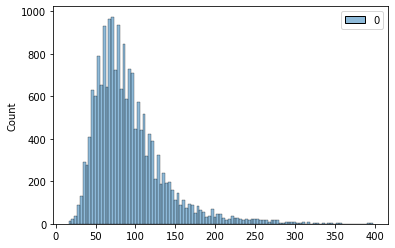

In [309]:
vocab_size = 10000

spm_tokenizer = generate_spm_tokenizer(corpus, vocab_size)
tokenized_corpus = []

# 토큰의 길이가 50 이하인 문장만 남깁니다. 
for idx in range(len(corpus)):
    tokenized_corpus.append(spm_tokenizer.EncodeAsIds(corpus[idx]))
    
len_tokenized = [map(lambda s: len(s), tokenized_corpus)]
import seaborn as sns
sns.histplot(len_tokenized)

In [310]:
import matplotlib.pyplot as plt
%matplotlib inline

In [311]:
from sklearn.model_selection import train_test_split

max_len = 1000

#X_train, X_rem, y_train, y_rem = train_test_split(tokenized_corpus, train_data['class'], train_size=0.8, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

X_train, X_val, y_train, y_val = train_test_split(tokenized_corpus, test_['class'], train_size=0.1, random_state=42)


print(len(X_train)), print(len(y_train))
print(len(X_val)), print(len(y_val))
#print(len(X_test)), print(len(y_test))

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='pre', maxlen=max_len)
X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val, padding='pre', maxlen=max_len)
#X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='pre', maxlen=max_len)

1898
1898
17086
17086


In [312]:
type(X_train)
type(y_train)
y_train.head()

5097     2
7263     1
4644     2
3716     0
12728    0
Name: class, dtype: int64

In [313]:
inputs = keras.layers.Input(shape=(None,))
x = keras.layers.Embedding(vocab_size, 128)(inputs)

#x = keras.layers.LSTM(256, return_sequences=True)(x)
#x = keras.layers.SimpleRNN(128)(x)
x = keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)(x)
#x = keras.layers.GRU(128, dropout=0.2, recurrent_dropout=0.2)(x)
#x = keras.layers.Conv1D(128, kernel_size=3, padding='same')
#x = keras.layers.Bidirectional(keras.layers.LSTM(128))(x)

x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dense(4, activation="softmax")(x)

model = keras.Model(inputs, x)

model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_7 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 1028      
Total params: 1,445,636
Trainable params: 1,445,636
Non-trainable params: 0
_________________________________________________________________


In [314]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [315]:
hist = model.fit(X_train, 
                 y_train, 
                 validation_data=(X_val, y_val), 
                 batch_size=256, 
                 epochs = 10,)

Epoch 1/10
8/8 [==============================] - 50s 6s/step - loss: 1.3819 - accuracy: 0.3446 - val_loss: 1.3747 - val_accuracy: 0.4170
Epoch 2/10
8/8 [==============================] - 48s 6s/step - loss: 1.3434 - accuracy: 0.5174 - val_loss: 1.2719 - val_accuracy: 0.4418
Epoch 3/10
8/8 [==============================] - 48s 6s/step - loss: 1.2703 - accuracy: 0.4737 - val_loss: 1.1693 - val_accuracy: 0.5789
Epoch 4/10
8/8 [==============================] - 48s 6s/step - loss: 1.0144 - accuracy: 0.6928 - val_loss: 1.0180 - val_accuracy: 0.5282
Epoch 5/10
8/8 [==============================] - 48s 6s/step - loss: 0.8806 - accuracy: 0.6902 - val_loss: 1.0604 - val_accuracy: 0.6120
Epoch 6/10
8/8 [==============================] - 48s 6s/step - loss: 0.8595 - accuracy: 0.8003 - val_loss: 0.9985 - val_accuracy: 0.6632
Epoch 7/10
8/8 [==============================] - 48s 6s/step - loss: 0.6882 - accuracy: 0.8699 - val_loss: 0.8584 - val_accuracy: 0.7067
Epoch 8/10
8/8 [==================

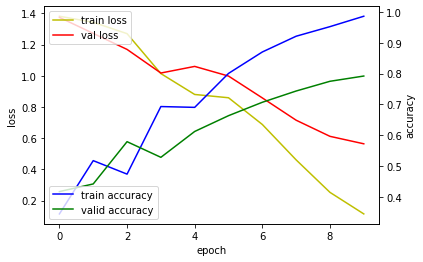

In [316]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'valid accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [317]:
test_data = pd.read_json("~/aiffel/dktc/data/test.json")
test_data = test_data.transpose()
test_data.head()

,text
t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
t_005,그러니까 빨리 말해. 선생님 제발 살려주십시오. 비밀번호 틀릴 때마다 손톱 하나씩...


In [318]:
test_corpus = [preprocess_sentence(s) for s in test_data["text"]]
tokenized_test_corpus = []
for idx in range(len(test_corpus)):
    tokenized_test_corpus.append(spm_tokenizer.EncodeAsIds(test_corpus[idx]))
    
X_test = tf.keras.preprocessing.sequence.pad_sequences(tokenized_test_corpus, padding='pre', maxlen=max_len)

In [319]:
predicted = model.predict(X_test)

In [320]:
import numpy as np

predicted = np.argmax(predicted, axis=-1)

In [321]:
submission = pd.read_csv("~/aiffel/dktc/data/submission.csv")

In [322]:
submission['class'] = predicted

In [323]:
submission.head()

,file_name,class
0,t_000,1
1,t_001,2
2,t_002,2
3,t_004,3
4,t_005,0


In [324]:
submission.to_csv("aug_LSTM+dropout.csv", index=False) ##


In [325]:
len(submission)

400